In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
import random

# data simulation 
# data1 for Sphere and Line
x=[]
y=[]
z=[]

i=0
while i<1000:
    xnew=random.uniform(-3,3)
    ynew=random.uniform(-3,3)
    if xnew**2+ynew**2<9:
        znew=np.sqrt(9-xnew**2-ynew**2)*random.sample([-1,1],1)[0]
        x.append(xnew)
        y.append(ynew)
        z.append(znew)
        i=i+1


x1=[]
y1=[]
z1=[]

for i in range(1000):
    xnew=random.uniform(-3.5,3.5)
    x1.append(xnew)
    y1.append(xnew)
    z1.append(-1.5*xnew)

x.extend(x1)
y.extend(y1)
z.extend(z1)

data1=[]
for i in range(len(x)):
    data1.append([x[i],y[i],z[i]])

data1

[[-0.7663378391768667, -0.16665184182721315, 2.895678414441308],
 [0.8861160776489561, -0.16637978520415508, -2.861313695491539],
 [-1.0369472770640626, 0.27525425041951834, 2.8016022990809057],
 [1.581182106314845, 0.8117395900705611, 2.4168040848570715],
 [2.00214784027553, 0.6806351034004958, 2.1279426406036013],
 [-1.1534318260455285, -0.993483368720959, 2.5850697899167314],
 [1.834728803550238, -1.409106697930379, -1.9100231755847508],
 [1.7543156886040787, -1.4906127778901124, 1.9236553774281713],
 [-1.3136979727524953, 0.1014946334115141, 2.6951616789674504],
 [-2.456060442778321, 1.155497970593684, -1.2777290563235364],
 [1.9049797347336872, -0.013958256463180163, 2.317511030681511],
 [-0.520869755245521, 0.6149354186511555, 2.8897316707540166],
 [-0.03757027588292061, -1.7776742833124193, 2.4162910869387733],
 [-0.5899804612956521, 2.149392040050235, 2.0079932553318147],
 [2.426820188143097, 0.7105790309279922, 1.61419367339441],
 [-0.7960598490980733, -2.1293502907171424, -1.

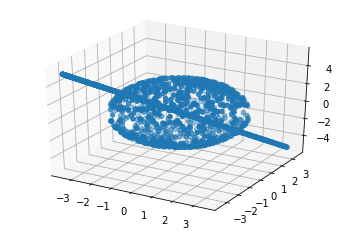

In [6]:
# plot data1
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z)

In [7]:
# SSC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# sparse Lasso regression for given index
def lasso(data,index,alpha=1,maxiter=1000): # data is a list of data points where each element is a point; index is the index of y
    n=len(data) # num of data points
    m=len(data[0]) # dim of data
    X=np.zeros((m,n-1)) # construct X
    if index == 0:
        for i in range(n-1):
            X[:,i]=data[i+1]
    elif index == n-1:
        for i in range(n-1):
            X[:,i]=data[i]
    else:
        for i in range(index):
            X[:,i]=data[i]
        for i in range(index,n):
            X[:,i-1]=data[i]
    y=np.array(data[index])  # construct y
    model=Lasso(alpha,max_iter=maxiter)
    model.fit(X,y)  #fit the model
        return model.coef_ # return coefficients

In [16]:
# store coefficients in matrix B, given matrix B, coefficient and corresponding index
def store(coef,B,index):
    n=len(coef)
    if index==0:
        for i in range(n):
            B[i+1,index]=coef[i]
    elif index==n:
        for i in range(n):
            B[i,index]=coef[i]
    else:
        for i in range(index):
            B[i,index]=coef[i]
        for i in range(index,n):
            B[i+1,index]=coef[i]
    return B

In [6]:
B=np.zeros((2000,2000))

In [17]:
for i in range(2000):
    coef=lasso(data1,i,alpha=2,maxiter=10000)
    B=store(coef,B,i)

In [18]:
B=np.abs(B)
W=B+B.T # construct W

In [19]:
def laplace(W):
    n=len(W)
    a=[]
    for i in range(n):
        a.append(sum(W[i]))
    a=np.array(a)
    D=np.diag(a)
    return D-W

In [20]:
L=laplace(W)

In [21]:
L

array([[0.25194751, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28640677, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.52954428,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.64414836]])

In [22]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

In [23]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids

In [24]:
def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k,1)
    return centroids

In [25]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return clusterAssment

In [26]:
def min_k_index(v,k):
    v2=copy.deepcopy(v)
    v2=np.abs(v2)
    v2=list(set(v2))
    for i in range(k-1):
        v2.remove(min(v2))
    idx=np.argwhere(np.abs(v)==min(v2))[0][0]
    return idx

In [322]:
mdat1=np.zeros((2000,3))
mdat1[:,0]=v[:,min_k_index(u,1)]
mdat1[:,1]=v[:,min_k_index(u,2)]
mdat1[:,2]=v[:,min_k_index(u,3)]

In [323]:
pre_idx1=kMeans(mdat1,2)[:,0]

In [324]:
x_1=[]
y_1=[]
z_1=[]
x_2=[]
y_2=[]
z_2=[]
data_1=[]
data_2=[]
for i in range(len(pre_idx1)):
    if pre_idx1[i]==0:
        x_1.append(x[i])
        y_1.append(y[i])
        z_1.append(z[i])
        data_1.append(data1[i])
    else:
        x_2.append(x[i])
        y_2.append(y[i])
        z_2.append(z[i])
        data_2.append(data1[i])

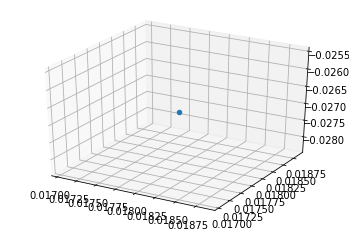

In [327]:
ax=plt.subplot(111, projection='3d')
ax.scatter(x_2,y_2,z_2)

In [275]:
pre_idx=[]
for i in range(2000):
    pre_idx.append(int(pre_idx1[i]))
pre_idx=np.array(pre_idx)

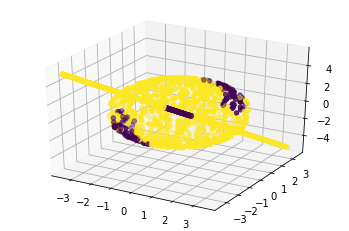

In [35]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v[:,min_k_index(u,2)])

In [300]:
lasso(data1,index=0)

IndexError: list index out of range

In [8]:
# data2 for two lines and one plane
a=[]
b=[]
c=[]

a1=[]
b1=[]
c1=[]

for i in range(1000):
    a1.append(0)
    b1.append(random.uniform(-3.5,3.5))
    c1.append(random.uniform(-3.5,3.5))

a.extend(a1)
b.extend(b1)
c.extend(c1)


a2=[]
b2=[]
c2=[]

for i in range(1000):
    a2.append(random.uniform(-3.5,3.5))
    b2.append(0)
    c2.append(0)

a.extend(a2)
b.extend(b2)
c.extend(c2)

data2=[]
for i in range(len(a)):
    data2.append([a[i],b[i],c[i]])   

data2    

[[0, -0.250419359409797, 2.5629373266562467],
 [0, -1.3142972737343435, -1.2379399106415367],
 [0, 1.5640308751988767, -0.08780694315660487],
 [0, -3.222634196960125, 0.2981718867785288],
 [0, 3.0797313539416953, 3.4001971373078295],
 [0, -3.3928330491689676, 2.61840300386726],
 [0, 2.9109526846415914, -1.2335521512829222],
 [0, -0.2953894724920674, 1.8503479318865992],
 [0, -0.7852731554935488, -3.034967820330715],
 [0, -1.2921431669650763, 1.7096253523020657],
 [0, -1.6702107252553924, -2.4815562451714634],
 [0, 1.880719975747688, 0.9820042124159185],
 [0, -1.0595382144190184, -2.6906332620703273],
 [0, 1.8671122591724307, -2.442442372079602],
 [0, 1.9538656005721302, 2.5135112436399254],
 [0, 2.2042918208591242, 1.017560363313823],
 [0, -1.3454413744720242, 1.9497327716465023],
 [0, -2.4727979553759685, 1.0491415841169474],
 [0, 0.622790963259555, 1.7696191104864525],
 [0, -2.5516236807843544, 3.284071413822467],
 [0, 1.355814422773907, -1.6245175164689207],
 [0, 2.76937734057549, -

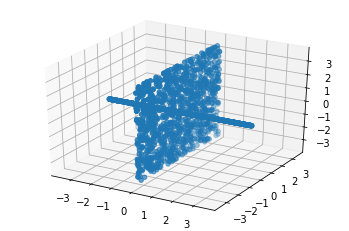

In [9]:
ax = plt.subplot(111, projection='3d')
ax.scatter(a,b,c)

In [38]:
B=np.zeros((2000,2000))

In [39]:
for i in range(2000):
    coef=lasso(data2,i,maxiter=10000)
    B=store(coef,B,i)

In [40]:
B=np.abs(B)
W=B+B.T

In [41]:
L=laplace(W)

In [42]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

In [336]:
mdat1=np.zeros((2000,3))
mdat1[:,0]=v[:,min_k_index(u,1)]
mdat1[:,1]=v[:,min_k_index(u,2)]
mdat1[:,2]=v[:,min_k_index(u,3)]

In [337]:
pre_idx1=kMeans(mdat1,2)[:,0]

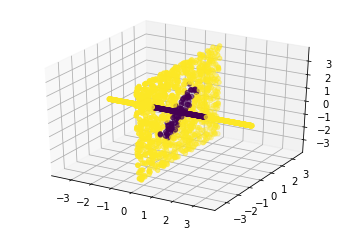

In [43]:
ax = plt.subplot(111, projection='3d')
ax.scatter(a,b,c,c=v[:,min_k_index(u,2)])

In [467]:
X=np.zeros((3,1999))
for i in range(1999):
    X[:,i]=data1[i]
y=np.array(data1[1999])

In [4]:
?isinstance